In [ ]:
!pip install scikit-learn

In [237]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Get the iris sample dataset
diabetes = datasets.load_diabetes()

# Seperate the dataset into training and test sets
full_train_data, full_test_data, train_labels, test_labels = train_test_split(diabetes['data'], diabetes['target'])

In [160]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

# Perform recursive feature elimination
model = linear_model.LinearRegression()
eliminator = RFE(model, n_features_to_select=2).fit(full_train_data, train_labels)

# Construct datasets with only the best features
train_data = []
test_data = []

feature1 = 0
feature2 = 0
features_found = 0
for i in range(len(eliminator.support_)):
    if eliminator.support_[i] and features_found == 0:
        feature1 = i
        features_found = 1
        continue
    elif eliminator.support_[i] and features_found == 1:
        feature2 = i
        break

# Print the names of the features chosen
print(diabetes['feature_names'][feature1])
print(diabetes['feature_names'][feature2])

for point in full_train_data:
    train_data.append( [ point[feature1], point[feature2] ])
for point in full_test_data:
    test_data.append( [ point[feature1], point[feature2] ])

bmi
s5


In [234]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculate_metrics(model, test_data, test_labels):
    # Calculate the mean square error between the model and the test data as well as the coefficient of variance.

    print("Mean squared error:")
    print(mean_squared_error(model.predict(test_data), test_labels))
    print("Coefficient of determination:")
    print(r2_score(model.predict(test_data), test_labels))

In [95]:
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import numpy as np

def graph(model, point=None):
    # Graph the decision surface of the model, plus a point if given

    # Graph every point inside the extrema of the training data
    xx, yy = np.meshgrid(np.arange(-0.2, 0.2, 0.002), np.arange(-0.2, 0.2, 0.002))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape((xx.shape[0], xx.shape[1]))
    im = plt.imshow(Z, extent=(-0.2, 0.2, -0.2, 0.2), origin="lower", cmap=plt.cm.Purples)
    if point:
        plt.scatter(point[0], point[1], c=point[2])
    plt.colorbar()

Mean squared error:
6807.696777961222
Coefficient of determination:
-797.9850158038888


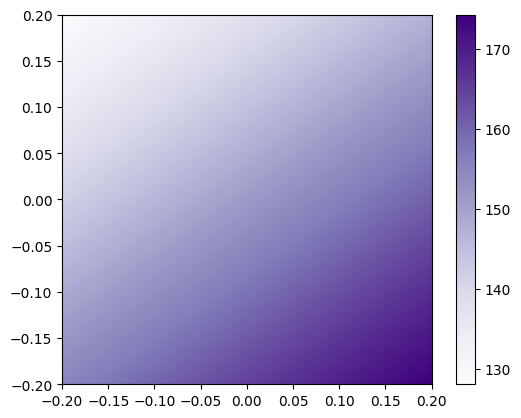

In [238]:
# Train a linear regression model
model = linear_model.LinearRegression()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

In [33]:
# Print the range of test values
print(min(test_labels))
print(max(test_labels))

48.0
308.0


Mean squared error:
6798.331865033074
Coefficient of determination:
-7746.952306414803


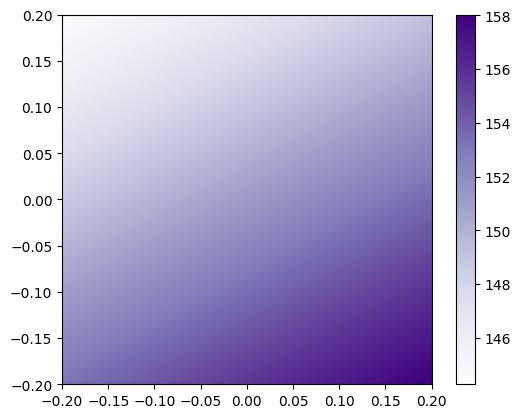

In [239]:
# Train a Ridge model
model = linear_model.Ridge()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
6799.669316368075
Coefficient of determination:
-8391304346519.358


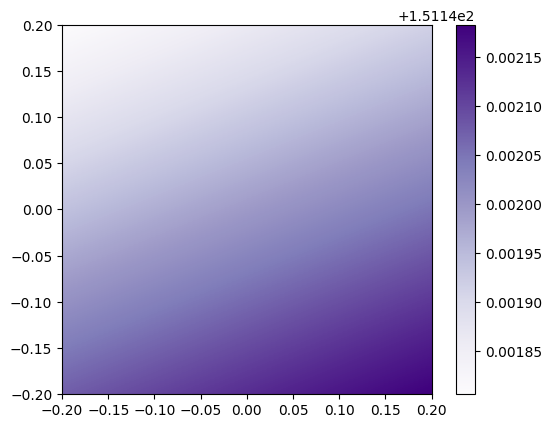

In [240]:
# Train a Bayesian Ridge model
model = linear_model.BayesianRidge()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
6799.669338612559
Coefficient of determination:
-13773425502524.285


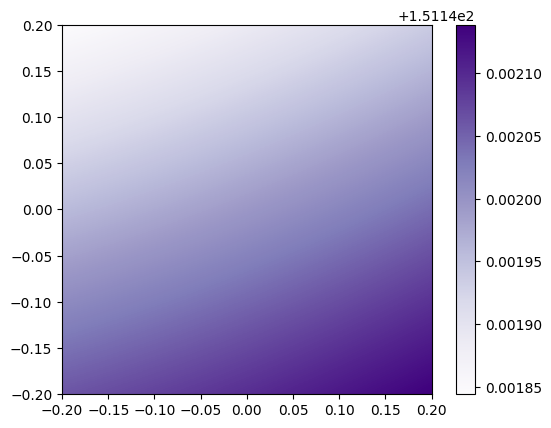

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Retrain the model in polynomial space
polynomial = PolynomialFeatures(degree=2)
pipeline = Pipeline([("poly", polynomial), ("regression", model)])
pipeline.fit(train_data, train_labels)

calculate_metrics(pipeline, test_data, test_labels)
graph(pipeline)

Mean squared error:
6802.34053117699
Coefficient of determination:
-4739.4181189580795


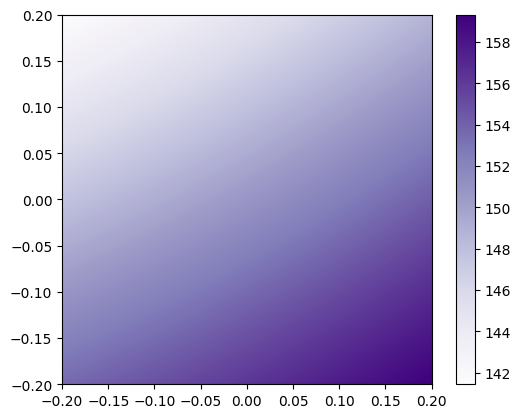

In [242]:
from sklearn.kernel_ridge import KernelRidge

# Train a Ridge model with a polynomial kernel function
model = KernelRidge(kernel="poly")
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
30029.34715537277
Coefficient of determination:
-124.36539736036346


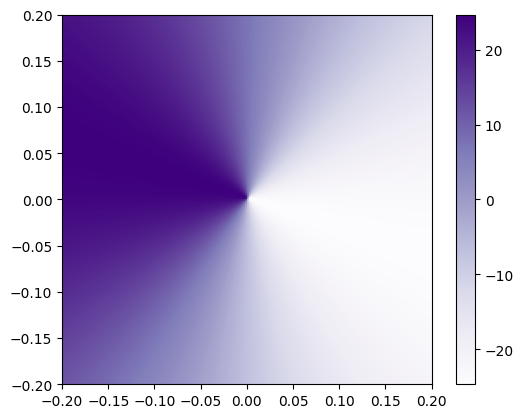

In [243]:
# Train a Ridge model with a cosine kernel function
model = KernelRidge(kernel="cosine")
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
6905.786656734474
Coefficient of determination:
-226.9730999052906


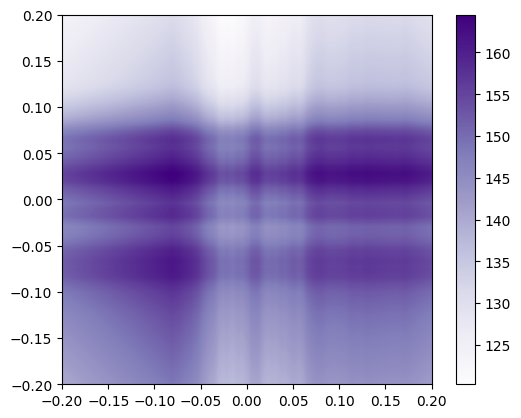

In [244]:
# Train a Ridge model with a laplacian kernel function
model = KernelRidge(kernel="laplacian")
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
6801.522101244107
Coefficient of determination:
-6924.25964208403


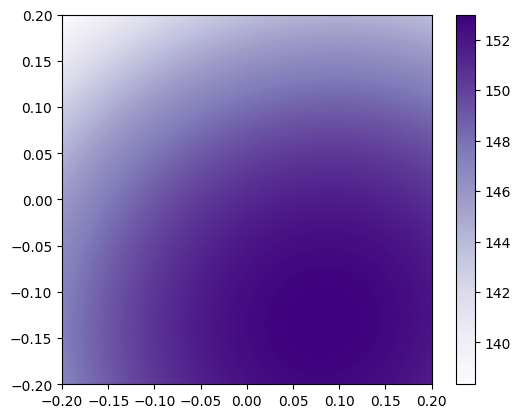

In [245]:
# Train a Ridge model with a radial basis function kernel function
model = KernelRidge(kernel="rbf")
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
6803.845234183351
Coefficient of determination:
-90200.96615980008


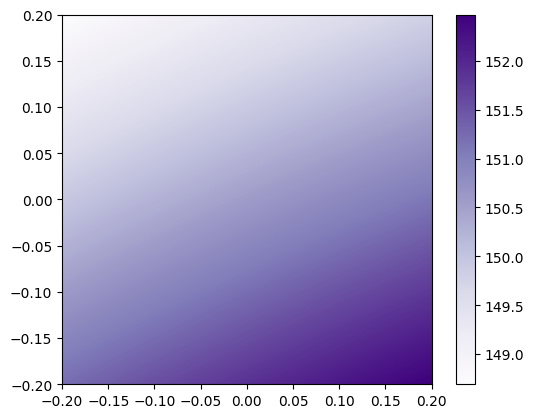

In [246]:
# Train a Ridge model with a sigmoid kernel function
model = KernelRidge(kernel="sigmoid")
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
8796.321081081082
Coefficient of determination:
-6.5699792772379375


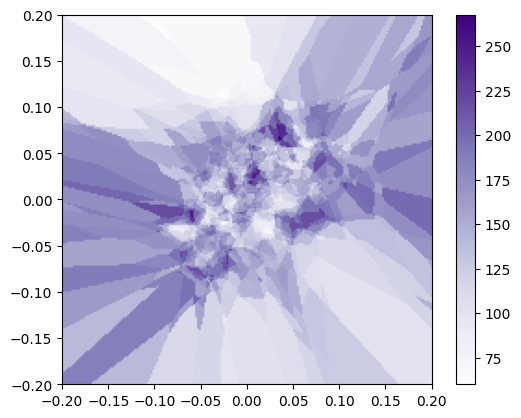

In [247]:
from sklearn.neighbors import KNeighborsRegressor

# Train a Nearest Neighbors model
model = KNeighborsRegressor()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
12005.135135135135
Coefficient of determination:
-0.9687365761399545


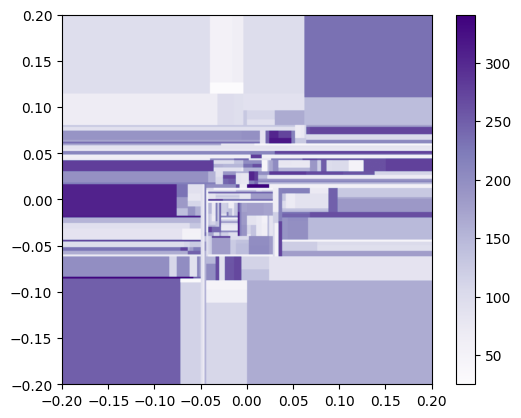

In [248]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree regressor model
model = DecisionTreeRegressor()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
8441.26782332159
Coefficient of determination:
-5.513348860298165


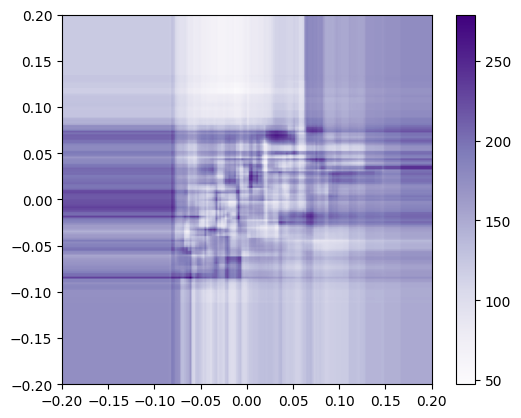

In [249]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor model
model = RandomForestRegressor()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
7154.515405630522
Coefficient of determination:
-62.449932401380046


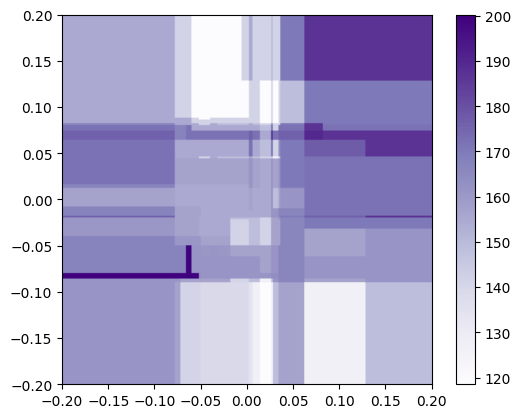

In [250]:
from sklearn.ensemble import AdaBoostRegressor

# Train an Ada Boost regressor model
model = AdaBoostRegressor()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
7090.650697631879
Coefficient of determination:
-40.3968136447835


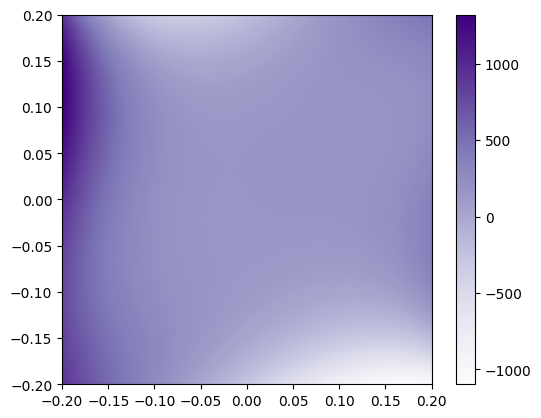

In [251]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Train a Gaussian Process regressor model
model = GaussianProcessRegressor()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
7055.618029506418
Coefficient of determination:
-2732.0678711548394


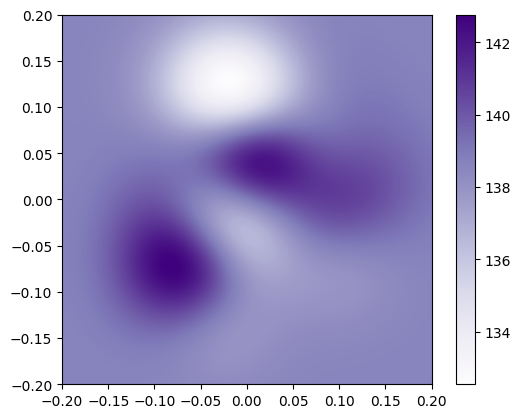

In [252]:
from sklearn.svm import SVR

# Train a Support Vector Regressor model
model = SVR()
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

Mean squared error:
6801.840161688349
Coefficient of determination:
-1399.3142595668344


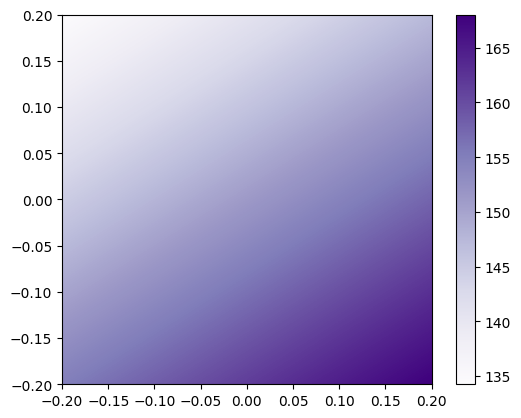

In [253]:
from sklearn.neural_network import MLPRegressor

# Train a multilayer perceptron regressor model
model = MLPRegressor(max_iter=4000)
model.fit(train_data, train_labels)

calculate_metrics(model, test_data, test_labels)
graph(model)

In [162]:
# Train a lasso regressor model
model = linear_model.Lasso()
model.fit(full_train_data, train_labels)

calculate_metrics(model, full_test_data)

Mean squared error:
3059.756638727629
Coefficient of determination:
-2.595382617611207


In [163]:
# Check the coefficients for the model
print(model.coef_)

[  0.           0.         385.7110526    0.           0.
   0.          -0.           0.         304.14354254   0.        ]


In [269]:
def graph_large_coef(model, train_data, train_labels, point=None):
    # Find the largest coefficients (up to 2) and graph only those

    # Find the non-zero features
    chosen_features = []
    
    for i, j in enumerate(model.coef_):
        if j.any() > 0.0000001:
            chosen_features.append(i)

    # Don't visualize if > 2 features
    if len(chosen_features) >= 3:
        print("3+ features used in model, cannot visualize")

    elif len(chosen_features) == 2:
    
        # Graph every point inside the extrema of the training data
        xx, yy = np.meshgrid(np.arange(-0.2, 0.2, 0.002), np.arange(-0.2, 0.2, 0.002))
        Z = []
        for i in np.c_[xx.ravel(), yy.ravel()]:
            new_point = [0] * len(model.coef_)
            new_point[chosen_features[0]] = i[0]
            new_point[chosen_features[1]] = i[1]
            Z.append(model.predict([new_point]))
        Z = np.asarray(Z)
        Z = Z.reshape((xx.shape[0], xx.shape[1]))
        im = plt.imshow(Z, extent=(-0.2, 0.2, -0.2, 0.2), origin="lower", cmap=plt.cm.Purples)
        if point:
            plt.scatter(point[0], point[1], c=point[2])
        plt.colorbar()

    else: 

        # Plot the data points and the model
        plt.scatter(x= [ i[chosen_features[0]] for i in train_data ], y=train_labels)
        region = np.linspace(-.2, .2, num=100)
        predictions = []
        for i in range(len(region)):
            new_point = [0] * len(model.coef_)
            new_point[chosen_features[0]] = region[i]
            predictions.append(model.predict([new_point]))
        
        plt.plot(region, predictions)
        
    

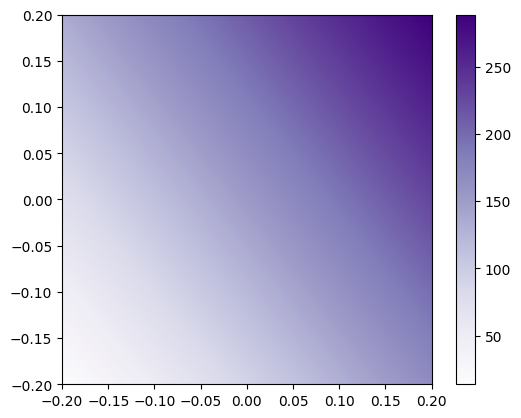

In [180]:
graph_large_coef(model, full_train_data, train_labels)

In [254]:
from sklearn.linear_model import ElasticNet

# Train an ElasticNet model
model = linear_model.ElasticNet()
model.fit(full_train_data, train_labels)

calculate_metrics(model, full_test_data, test_labels)
graph_large_coef(model, full_train_data, train_labels)

Mean squared error:
6743.952093914589
Coefficient of determination:
-30894.44266814789
3+ features used in model, cannot visualize


In [255]:
from sklearn.linear_model import Lars

# Train a least angle regression model
model = linear_model.Lars()
model.fit(full_train_data, train_labels)

calculate_metrics(model, full_test_data, test_labels)
graph_large_coef(model, full_train_data, train_labels)

Mean squared error:
4482.893737858137
Coefficient of determination:
0.2709611838881112
3+ features used in model, cannot visualize


In [256]:
from sklearn.linear_model import LassoLars

# Train a lasso model using LARS for fitting
model = linear_model.LassoLars()
model.fit(full_train_data, train_labels)

calculate_metrics(model, full_test_data, test_labels)
graph_large_coef(model, full_train_data, train_labels)

Mean squared error:
4393.847649761514
Coefficient of determination:
-5.066707997098222
3+ features used in model, cannot visualize


Mean squared error:
4565.144553664577
Coefficient of determination:
-1.8174227357129111


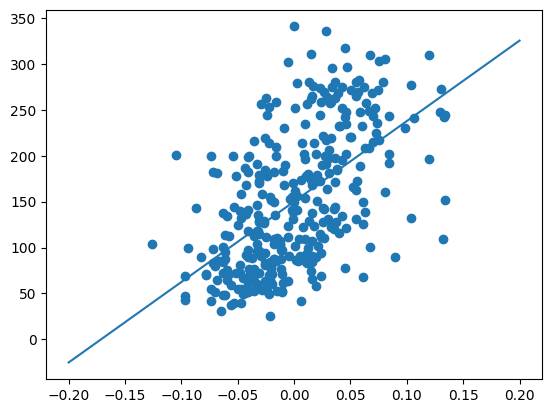

In [257]:
# Train an Orthogonal Matching Pursuit model
model = linear_model.OrthogonalMatchingPursuit()
model.fit(full_train_data, train_labels)

calculate_metrics(model, full_test_data, test_labels)
graph_large_coef(model, full_train_data, train_labels)

In [258]:
# Train an Automatic Relevence Determination model
model = linear_model.ARDRegression()
model.fit(full_train_data, train_labels)

calculate_metrics(model, full_test_data, test_labels)
graph_large_coef(model, full_train_data, train_labels)

Mean squared error:
3281.339751600023
Coefficient of determination:
-0.028210871903264545
3+ features used in model, cannot visualize


In [230]:
# Remvoe the last column from the data set and add it as a second label
multi_train_data, multi_test_data, multi_train_labels, multi_test_labels = train_test_split(diabetes['data'][:,0:8], np.transpose(np.vstack([diabetes['data'][:,-1], diabetes['target']])))

# Print the name of the new label
print(diabetes['feature_names'][-1])

s6


In [268]:
# Train a Multitask Elastic Net model
model = linear_model.MultiTaskElasticNet()
model.fit(multi_train_data, multi_train_labels)

calculate_metrics(model, multi_test_data, multi_test_labels)

Mean squared error:
2872.806053692048
Coefficient of determination:
-54294.51197824985
